# Data Exploration - JMUBEN Dataset

In [1]:
import os, random
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
DATASETS_FOLDER = "./datasets"
PATH_JMUBEN = DATASETS_FOLDER + "/jmuben/original"

## 1. Opening a image from dataset

In [3]:
def choose_random_image_from_dataset(dataset_path):
    """Choose a random image from a dataset."""
    
    images = []

    for root, _, files in os.walk(dataset_path):
        for file in files:
            if (".jpg" in file) or (".png" in file):
                images.append(f"{root}/{file}")

    image_chosen = random.choices(images)[0]
    
    return image_chosen

>> Dataset: JMUBEN
>> Image chosen: ./datasets/jmuben/original/Healthy/10 (6342).jpg
>> Image original size: (128, 128)



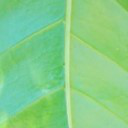

In [4]:
image_path = choose_random_image_from_dataset(PATH_JMUBEN)
image = Image.open(image_path)

print(">> Dataset: JMUBEN")
print(">> Image chosen:", image_path)
print(">> Image original size:", image.size)
print()

image = image.resize((128, 128))
image.show()

## 2. Counting the images of each disease

In [5]:
directories = os.listdir(PATH_JMUBEN)

### 2.1. Number of directories

In [6]:
print(PATH_JMUBEN + f": {len(directories)} directory(ies)")
for dir in directories:
    print(f">> {dir}")

./datasets/jmuben/original: 5 directory(ies)
>> Miner
>> Phoma
>> Healthy
>> Leaf rust
>> Cerscospora


### 2.2. Number of images in each directory

In [7]:
files_per_directory = {}

for dirs in directories:
    files = next(os.walk(PATH_JMUBEN + f"/{dirs}"))[2]
    files_per_directory[dirs] = len(files)
    
    print(f"{dirs}: {len(files)} images")

Miner: 16978 images
Phoma: 6571 images
Healthy: 18983 images
Leaf rust: 8336 images
Cerscospora: 7681 images


## 3. Plotting images distribution between classes

In [8]:
def calculating_total_of_images(files_per_directory):
    """Calculate total of images in dataset."""
    
    total_images = 0
    
    for value in files_per_directory.values():
        total_images += value
    
    return total_images

In [9]:
def calculating_distribution(files_per_directory, total_images):
    """Calculate sample distribution per dataset class."""
    
    dataset_info = {}
    
    for key, value in zip(files_per_directory.keys(), files_per_directory.values()):
        data = str(round((value/total_images)*100, 2)) + '%'
        dataset_info[key] = [value, data]
    
    return dataset_info

In [10]:
def plotting_histogram(files_per_directory):
    """Plot histogram of dataset sample distribution."""
    
    classes = ["Healthy", "Cerscospora", "Rust", "Miner", "Phoma"]
    values = []
    
    for c in classes:
        if c == "Rust":
            c = "Leaf rust"
        
        values.append(files_per_directory[c])
        
    samples_per_class = [value[0] for value in values]
    distributions = [value[1] for value in values]
    
    fig, ax = plt.subplots(figsize=(18, 5))
    ax.set_ylim([0, 22500])
    
    plt.bar(classes, samples_per_class, color=(0, 0.5, 0.8, 0.8))
    # plt.xticks(classes)
    plt.ylabel("Samples per class")
    
    for i in range(5):
        if i == 3:
            x = i-0.09
        else:
            x = i-0.10
            
        plt.text(x=x, y=samples_per_class[i]+350, s=distributions[i])

    plt.rcParams.update({"font.size":14})
    plt.savefig("./graphics/distribution_histogram.jpg", dpi=115, bbox_inches="tight")
    plt.show()

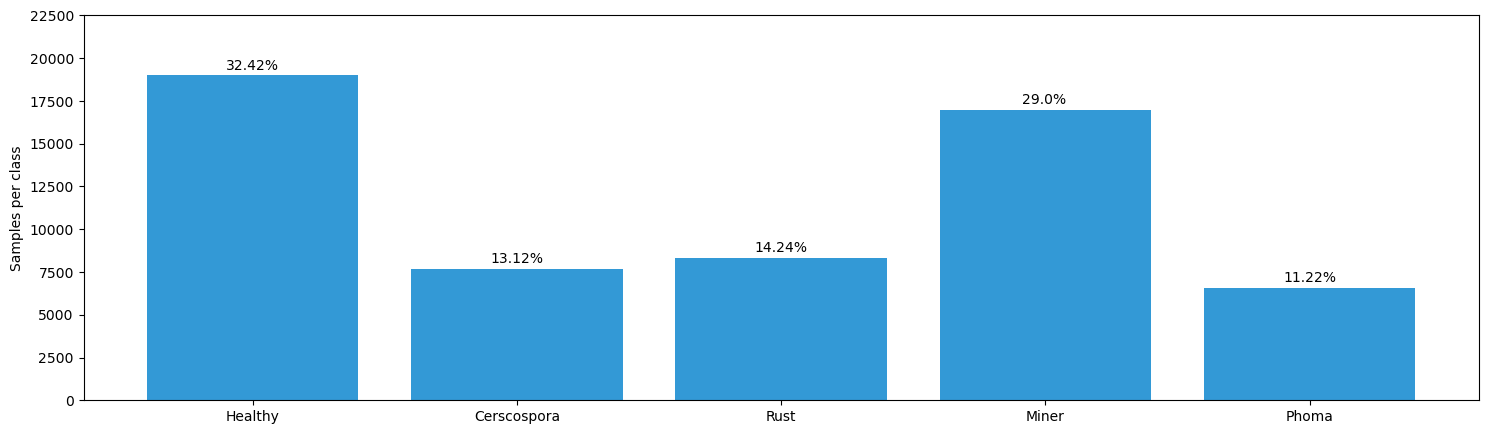

In [11]:
total_images = calculating_total_of_images(files_per_directory)
dataset_info = calculating_distribution(files_per_directory, total_images)
plotting_histogram(dataset_info)

## 4. Quantifying images dimension for standardization

In [12]:
dimentions = {}

In [13]:
for root, _, files in os.walk(PATH_JMUBEN):
    for file in files:
        try:
            image = Image.open(f"{root}/{file}")
            size = f"{image.size[0]} x {image.size[1]}"

            if size not in dimentions:
                dimentions[size] = 1
            else:
                dimentions[size] += 1
        except Exception as e:
            print(e)

In [14]:
print(f"Total of images: {total_images} images\n")
for size in sorted(dimentions, key=dimentions.get, reverse=True):
    print(f"{size} = {dimentions[size]} images")

Total of images: 58549 images

128 x 128 = 55596 images
122 x 256 = 224 images
256 x 125 = 128 images
256 x 120 = 128 images
92 x 256 = 128 images
116 x 256 = 128 images
94 x 256 = 128 images
113 x 256 = 128 images
104 x 256 = 120 images
256 x 99 = 96 images
108 x 256 = 96 images
256 x 126 = 96 images
123 x 256 = 96 images
256 x 112 = 96 images
111 x 256 = 88 images
109 x 256 = 64 images
125 x 256 = 64 images
102 x 256 = 64 images
103 x 256 = 64 images
114 x 256 = 64 images
256 x 111 = 64 images
119 x 256 = 56 images
74 x 256 = 32 images
256 x 87 = 32 images
124 x 256 = 32 images
100 x 256 = 32 images
256 x 127 = 32 images
96 x 256 = 32 images
89 x 256 = 32 images
256 x 118 = 32 images
101 x 256 = 32 images
256 x 116 = 32 images
117 x 256 = 32 images
256 x 124 = 32 images
118 x 256 = 32 images
256 x 108 = 32 images
82 x 256 = 32 images
80 x 256 = 32 images
256 x 90 = 32 images
105 x 256 = 32 images
93 x 256 = 32 images
256 x 102 = 32 images
256 x 110 = 32 images
256 x 98 = 32 images
25